### PROYECTO HERRAMIENTAS COMPUTACIONALES
## Estudiante 1: David Gutierrez
## Estudiante 2: Andres TRujillo

Universidad de los andes - 1 de Octubre del 2022
___

## 1) Organización de los datos
- Para este punto se realizo la organización de los datos en Dataframe. El tiempo de estudio fueron 5 meses del 1 de Agosto al 31 de diciembre del 2019.

In [11]:
#IMPORTAR LIBRERIAS
import pandas as pd

archivo= "data/SD_5Min.xlsx"
data_n=44064  #numero de datos en 5 datos

#SE CREAN TODOS LOS DATAFRAMES DE CADA HOJA PARA EVITAR PROBLEMAS DE INDICES 

rad=pd.read_excel(archivo,nrows=data_n,sheet_name="Radiacion",usecols=[0,1])
rad=rad.fillna(value=0)
ten_dc=pd.read_excel(archivo,nrows=data_n,sheet_name="Tension_DC",usecols=[0,1,2])
ten_dc=ten_dc.fillna(value=0)
corr_dc=pd.read_excel(archivo,nrows=data_n,sheet_name="Corriente_DC",usecols=[0,1,2])
corr_dc=corr_dc.fillna(value=0)
corr_ac=pd.read_excel(archivo,nrows=data_n,sheet_name="Corriente_AC",usecols=[0,1,2])
corr_ac=corr_ac.fillna(value=0)
pot_dc=pd.read_excel(archivo,nrows=data_n,sheet_name="Potencia_DC",usecols=[0,1,2])
pot_dc=pot_dc.fillna(value=0)
pot_ac=pd.read_excel(archivo,nrows=data_n,sheet_name="Potencia_AC",usecols=[0,1,2])
pot_ac=pot_ac.fillna(value=0)
temp=pd.read_excel(archivo,nrows=data_n,sheet_name="Temperatura",usecols=[0,1,2])
temp=temp.fillna(value=0)
ener=pd.read_excel(archivo,nrows=data_n,sheet_name="Energia",usecols=[0,1,2])
ener=ener.fillna(value=0)



/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## 2) Filtro de Datos hormiga
- Los datos que sean menores de 1.5 W/m^2. Esto se hace para reducir la desviación significativa de los datos a usar

In [12]:
a=0
b=0
print()

rad.loc[rad["Meteocontrol Irrad (W/m2)"]<= 1.75,"Meteocontrol Irrad (W/m2)"]=0
print(rad)



                     Date  Meteocontrol Irrad (W/m2)
0     2019-08-01 00:00:00                        0.0
1     2019-08-01 00:05:00                        0.0
2     2019-08-01 00:10:00                        0.0
3     2019-08-01 00:15:00                        0.0
4     2019-08-01 00:20:00                        0.0
...                   ...                        ...
44059 2019-12-31 23:35:00                        0.0
44060 2019-12-31 23:40:00                        0.0
44061 2019-12-31 23:45:00                        0.0
44062 2019-12-31 23:50:00                        0.0
44063 2019-12-31 23:55:00                        0.0

[44064 rows x 2 columns]


## ITEM 1 - COMPARACIÓNN DE VOLATJES Y CORRIENTES MEDIDAS VS CALCULADAS
# Calculo de Voltaje y corriente 

- Con esta información es posible determinar el voltaje de circuito abierto 𝑉_oc y la corriente 
de corto circuito I_oc, así: 

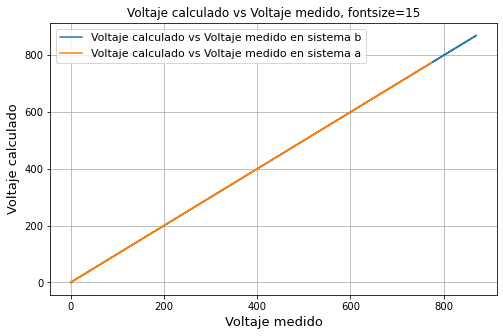

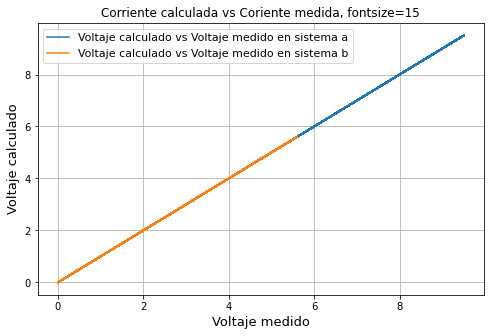

In [16]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as plt

beta=-0.00261
alpha=0.00021
t_mod=25

corr_dc.loc[corr_dc['DC Current SysA (A)'] >= 9.5, 'DC Current SysA (A)'] = 9.5
corr_dc.loc[corr_dc['DC Current SysB (A)'] >= 5.6, 'DC Current SysB (A)'] = 5.6


v_oc_b=ten_dc["DC Voltage SysB (V)"]
v_oc_a=ten_dc["DC Voltage SysA (V)"]

i_oc_a=corr_dc["DC Current SysA (A)"]
i_oc_b=corr_dc["DC Current SysB (A)"]

v_oc_a_m = v_oc_a +(beta*(temp["Tmod (degC)"]-t_mod))

v_oc_b_m = v_oc_b +(beta*(temp["Tmod (degC)"]-t_mod))

i_oc_a_m = i_oc_a +(alpha*(temp["Tmod (degC)"]-t_mod))

i_oc_b_m = i_oc_b +(alpha*(temp["Tmod (degC)"]-t_mod))

hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(v_oc_b, v_oc_b_m, label = "Voltaje calculado vs Voltaje medido en sistema b")
plt.plot(v_oc_a, v_oc_a_m, label = "Voltaje calculado vs Voltaje medido en sistema a")


plt.title("Voltaje calculado vs Voltaje medido, fontsize=15")
plt.ylabel("Voltaje calculado", fontsize=13)
plt.xlabel("Voltaje medido", fontsize=13)
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.legend(loc='best', fontsize=11)
plt.show()

plt.figure(figsize=(hor, ver))
plt.plot(i_oc_a, i_oc_a_m, label = "Voltaje calculado vs Voltaje medido en sistema a")
plt.plot(i_oc_b, i_oc_b_m, label = "Voltaje calculado vs Voltaje medido en sistema b")

plt.title("Corriente calculada vs Coriente medida, fontsize=15")
plt.ylabel("Voltaje calculado", fontsize=13)
plt.xlabel("Voltaje medido", fontsize=13)
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.legend(loc='best', fontsize=11)
plt.show()


## ITEM 2 - COMPARACIÓN DE POTENCIA DC MEDIDA VS CALCULADA
- Realice una gráfica en donde correlacione la medición de la potencia DC y el cálculo 
de 𝑃dc. ¿Q

                     Date  DC Power SysB (W)  DC Power SysA (W)
0     2019-08-01 00:00:00                0.0                0.0
1     2019-08-01 00:05:00                0.0                0.0
2     2019-08-01 00:10:00                0.0                0.0
3     2019-08-01 00:15:00                0.0                0.0
4     2019-08-01 00:20:00                0.0                0.0
...                   ...                ...                ...
44059 2019-12-31 23:20:00                0.0                0.0
44060 2019-12-31 23:25:00                0.0                0.0
44061 2019-12-31 23:30:00                0.0                0.0
44062 2019-12-31 23:35:00                0.0                0.0
44063 2019-12-31 23:40:00                0.0                0.0

[44064 rows x 3 columns]


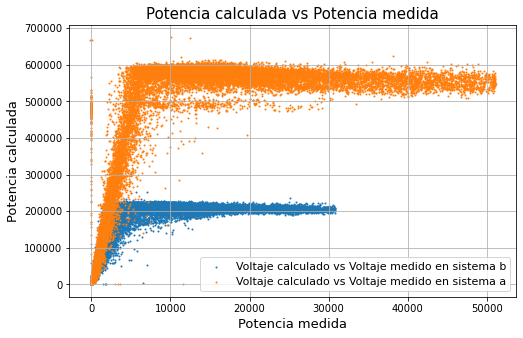

In [20]:
# SISTEMA A
pp_a=8
ps_a=16

# SISTEMA b
pp_b=4
ps_b=18

print(pot_dc)

#POTENCIA A
pot_dc_a_m= (v_oc_a_m*i_oc_a_m)*pp_a*ps_a*(1-0.269)
#POTENCIA B
pot_dc_b_m= (v_oc_b_m*i_oc_b_m)*pp_b*ps_b*(1-0.269)


plt.figure(figsize=(hor, ver))
plt.scatter(pot_dc["DC Power SysB (W)"],pot_dc_b_m,s=1, label = "Voltaje calculado vs Voltaje medido en sistema b")
plt.scatter(pot_dc["DC Power SysA (W)"],pot_dc_a_m,s=1, label = "Voltaje calculado vs Voltaje medido en sistema a")

plt.title("Potencia calculada vs Potencia medida", fontsize=15)
plt.ylabel("Potencia calculada", fontsize=13)
plt.xlabel("Potencia medida", fontsize=13)
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.legend(loc='best', fontsize=11)
plt.show()



## ITEM 3 - ESTIMAR POTENCIA POR MEDIO DE METODO NREL PVWATS 
- Ítem 3
Realice una gráfica en donde correlacione la medición de la potencia DC y el cálculo 
de 𝑃_dc a partir del modelo de potencia de NREL PVWatts.

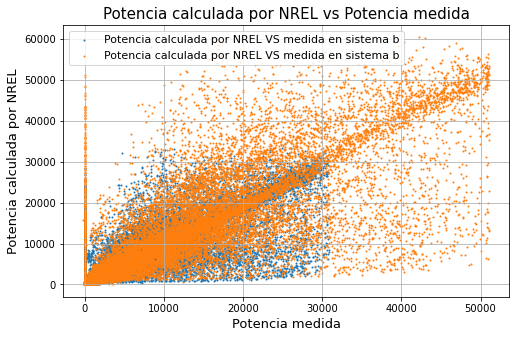

In [23]:
gama = -0.00361
t_mod=25
#SISTEMA A
pot_cero_dc_a=50881.1
#SISTEMA b
pot_cero_dc_b=28199.2

pot_med_dc_a_nrel= (rad["Meteocontrol Irrad (W/m2)"]/1000)*pot_cero_dc_a*(1+(gama*(temp["Tmod (degC)"]-t_mod)))
pot_med_dc_b_nrel= (rad["Meteocontrol Irrad (W/m2)"]/1000)*pot_cero_dc_b*(1+(gama*(temp["Tmod (degC)"]-t_mod)))


plt.figure(figsize=(hor, ver))
plt.scatter(pot_dc["DC Power SysB (W)"],pot_med_dc_b_nrel,s=1, label = "Potencia calculada por NREL VS medida en sistema b")
plt.scatter(pot_dc["DC Power SysA (W)"],pot_med_dc_a_nrel,s=1, label = "Potencia calculada por NREL VS medida en sistema a")

plt.title("Potencia calculada por NREL vs Potencia medida", fontsize=15)
plt.ylabel("Potencia calculada por NREL", fontsize=13)
plt.xlabel("Potencia medida", fontsize=13)
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.legend(loc='best', fontsize=11)
plt.show()


## ITEM 4 - POTENCIA AC CALCULADA POR NREL PVWATS

- Realice una gráfica en donde correlacione la medición de la potencia AC y el cálculo 
de 𝑃_ac a partir del modelo de potencia de NREL PVWatts. 